# Qredo tokenomics simulation - scenario overview

### June 2023

## 1. Imports

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
forecast_length = 365*2
outfolder = os.path.realpath("../data/sim_data")

## Explore simulation results by scenario

In [3]:
# load
df_file = os.path.join(outfolder, f"sample_by_scenario.pickle")
with open(df_file, "rb") as fp:
    df = pickle.load(fp)

# process columns
df["apr"] = 365.0*(df["total_staking_rewards"]-df["validators_rewards"])/df["staking_tvl"]
df["tvl_rate"] = df["staking_tvl"]/df["circ_supply"]
df["date"] = df["iteration"].apply(lambda x: dt.datetime(2023, 6, 15)+dt.timedelta(days=x)).values

# convert units
mill_cols = ["circ_supply", 'day_burned', 'day_vested', 'day_locked', 'day_released',
             "total_staking_rewards", "validators_rewards","ecosystem_fund", "staking_tvl"]
df[mill_cols] = df[mill_cols]/(10**6)

len(df)

3153600

In [4]:
df.columns

Index(['iteration', 'token_scenario', 'usage_scenario', 'staking_scenario',
       'circ_supply', 'day_burned', 'day_vested', 'day_locked', 'day_released',
       'staking_rewards_vested', 'staking_rewards_ecosystem',
       'total_staking_rewards', 'validators_rewards', 'market_cap',
       'day_burn_fees', 'day_service_fee_locked', 'ecosystem_fund',
       'staking_tvl', 'year_inflation', 'apr', 'tvl_rate', 'date'],
      dtype='object')

In [5]:
combined_df = df[(df["staking_scenario"]==df["usage_scenario"]) & (df["staking_scenario"]==df["token_scenario"])]

### Circulating supply

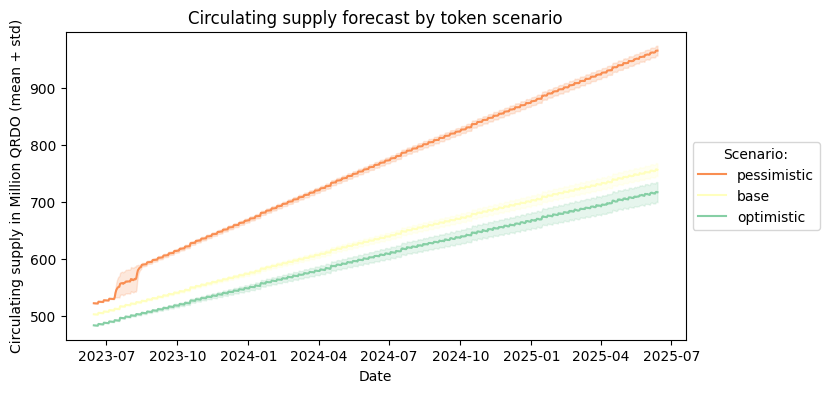

In [6]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="circ_supply", hue="token_scenario", errorbar="sd", palette="Spectral")
plt.title("Circulating supply forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

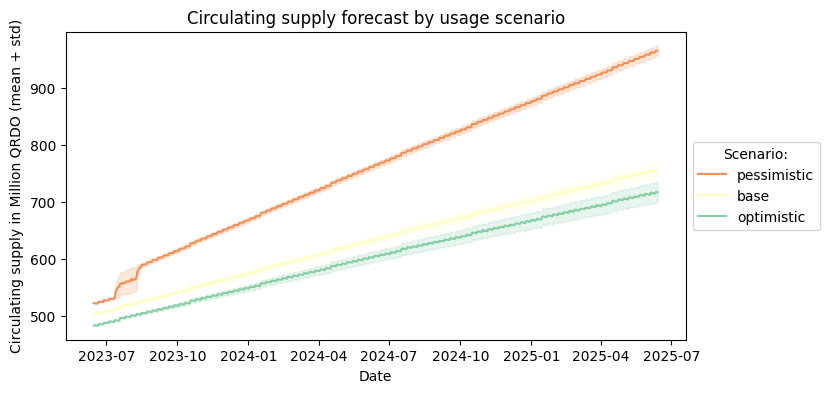

In [7]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="circ_supply", hue="usage_scenario", errorbar="sd", palette="Spectral")
plt.title("Circulating supply forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

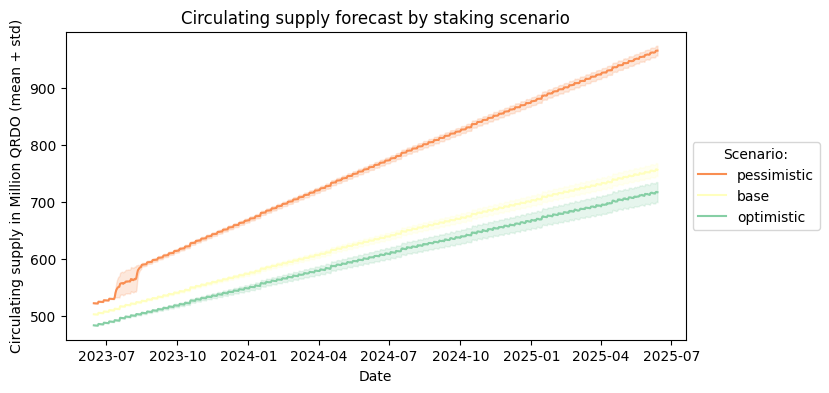

In [8]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="circ_supply", hue="staking_scenario", errorbar="sd", palette="Spectral")
plt.title("Circulating supply forecast by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

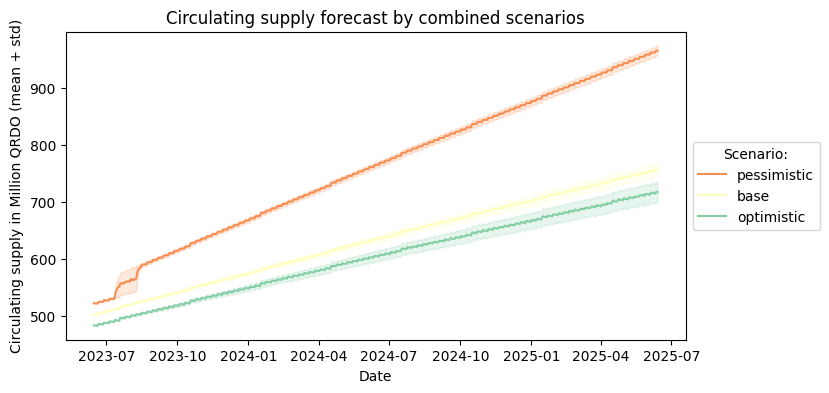

In [9]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=combined_df, x="date", y="circ_supply", hue="staking_scenario", errorbar="sd", palette="Spectral")
plt.title("Circulating supply forecast by combined scenarios") 
plt.xlabel("Date") 
plt.ylabel("Circulating supply in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

### Yearly inflation rate

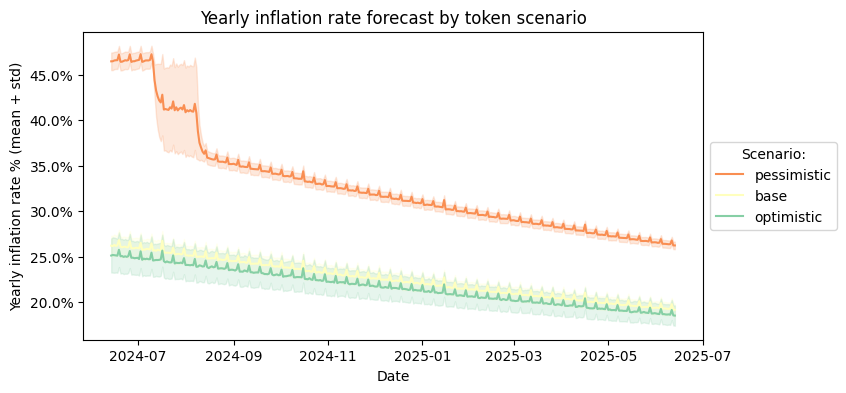

In [10]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="year_inflation", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title("Yearly inflation rate forecast by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

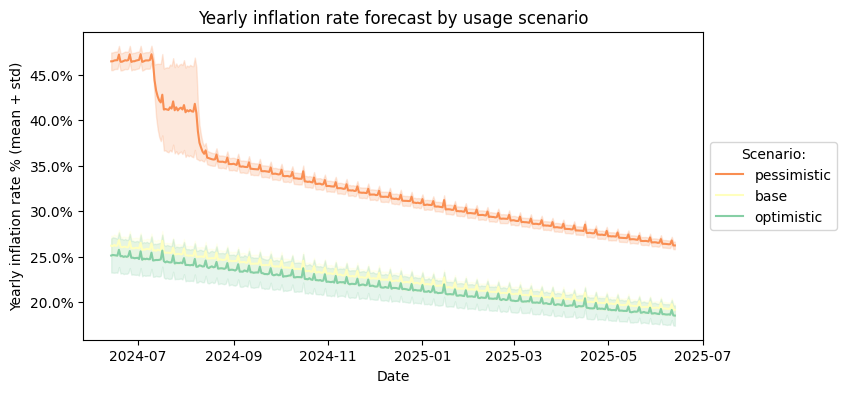

In [11]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="year_inflation", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title("Yearly inflation rate forecast by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

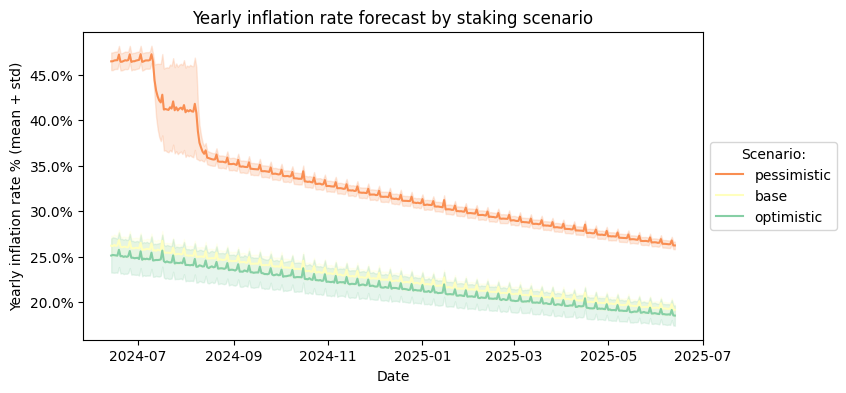

In [12]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="year_inflation", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title("Yearly inflation rate forecast by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

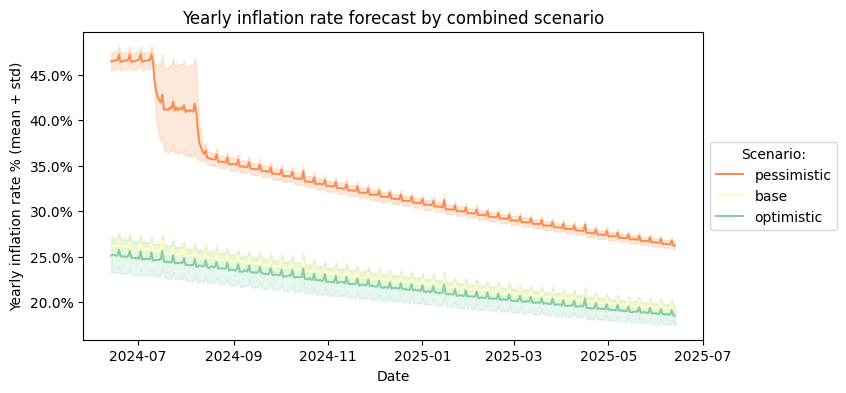

In [13]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=combined_df, x="date", y="year_inflation", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title("Yearly inflation rate forecast by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Yearly inflation rate % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

### Staking rewards and returns

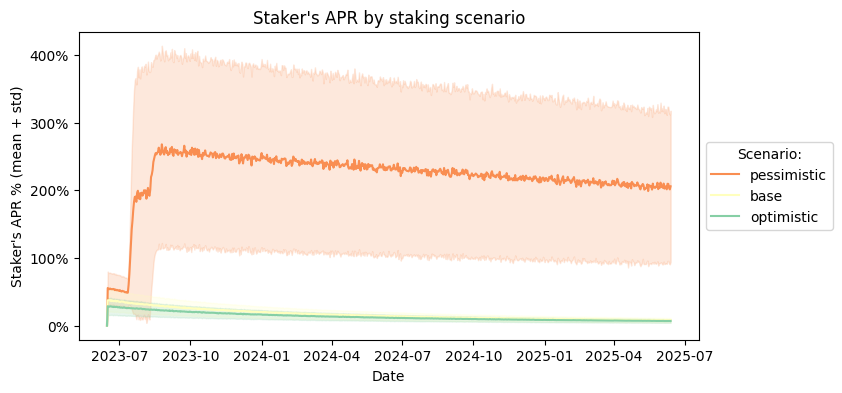

In [14]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="apr", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title("Staker's APR by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

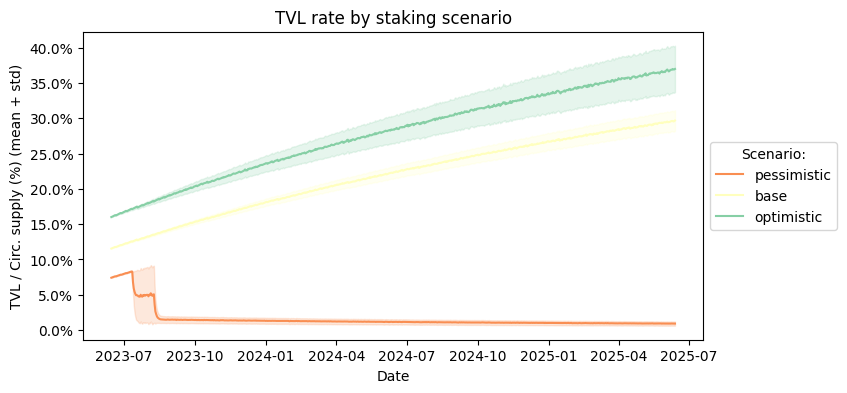

In [15]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="tvl_rate", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.title("TVL rate by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL / Circ. supply (%) (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

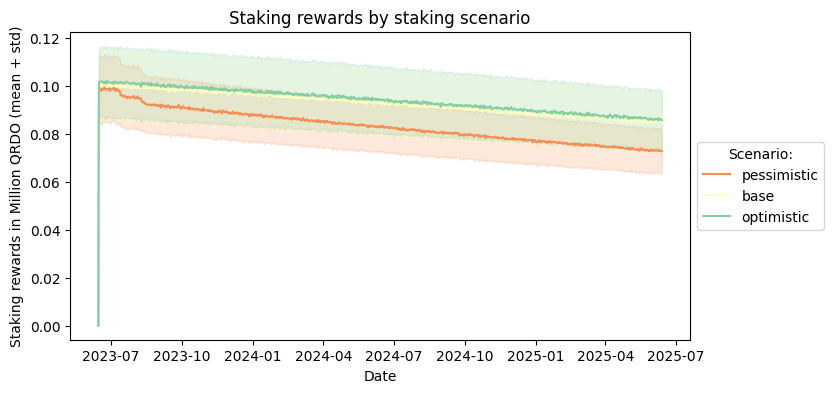

In [16]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="total_staking_rewards", hue="staking_scenario", errorbar="sd", palette="Spectral")
plt.title("Staking rewards by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Staking rewards in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

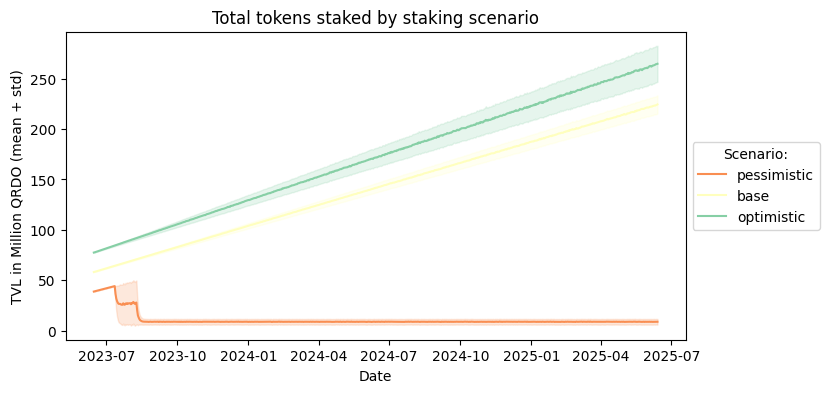

In [17]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="staking_tvl", hue="staking_scenario", errorbar="sd", palette="Spectral")
plt.title("Total tokens staked by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("TVL in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()

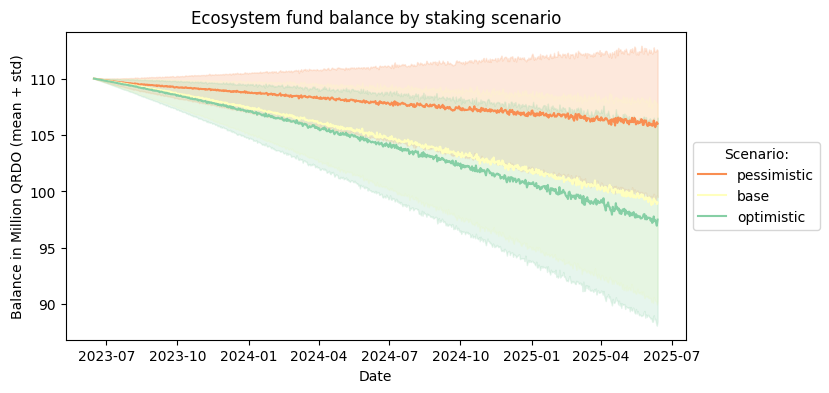

In [18]:
plt.figure(figsize=(8,4))
fig = sns.lineplot(data=df, x="date", y="ecosystem_fund", hue="staking_scenario", errorbar="sd", palette="Spectral")
plt.title("Ecosystem fund balance by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Balance in Million QRDO (mean + std)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Scenario:")
plt.show()